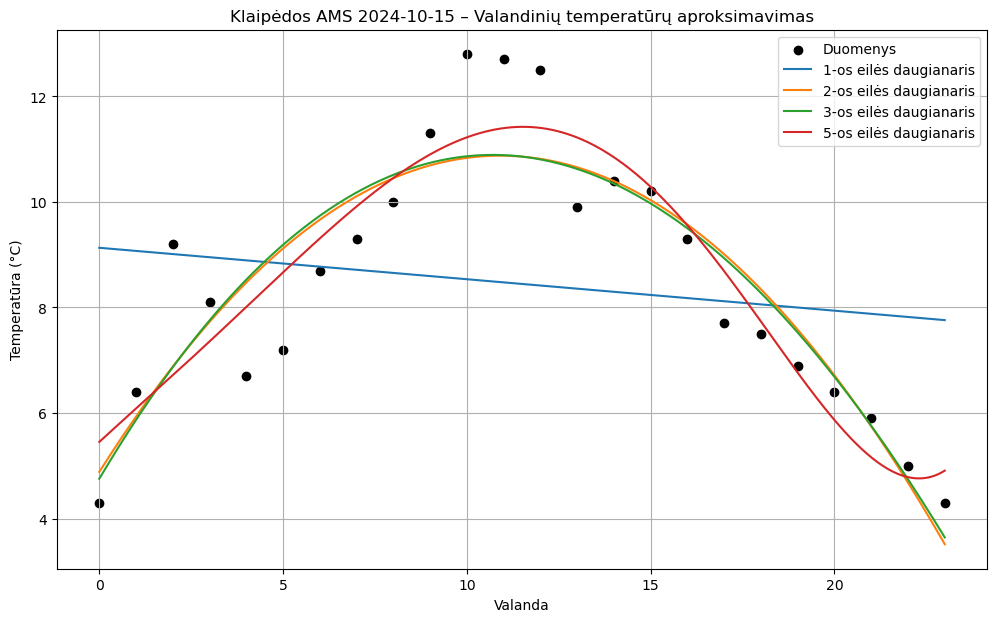


--- APROKSIMAVIMO DAUGIANARIŲ IŠRAIŠKOS ---

1-os eilės daugianaris:
f(x) =  - 0.05961·x + 9.13133

2-os eilės daugianaris:
f(x) =  - 0.05037·x^2 + 1.09887·x + 4.88358

3-os eilės daugianaris:
f(x) = 0.00024·x^3 - 0.05878·x^2 + 1.17464·x + 4.75402

5-os eilės daugianaris:
f(x) = 0.00002·x^5 - 0.00069·x^4 + 0.00599·x^3 - 0.01459·x^2 + 0.64206·x + 5.45164



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------
# Pagal MQM formulę apskaičiuojame n-to laipsnio daugianario koeficientus
# --------------------------------------------
def mqm_polyfit(x, y, n):
    """
    Mažiausių kvadratų metodas "rankiniu" būdu:
    sudarome dizaino (Vandermondės) matricą A,
    sprendžiame (A^T A) c = A^T y.
    
    Grąžina koeficientus c = [a_n, ..., a_1, a_0],
    kur p_n(x) = a_n x^n + ... + a_1 x + a_0
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    
    # A: kiekviena eilutė – [x_i^n, x_i^{n-1}, ..., x_i, 1]
    A = np.vander(x, N=n+1, increasing=False)
    
    # Normalinės lygtys: (A^T A) c = A^T y
    ATA = A.T @ A
    ATy = A.T @ y
    
    # Išsprendžiame sistemą ir gauname daugianario koeficientus
    coeffs = np.linalg.solve(ATA, ATy)
    return coeffs

# --------------------------------------------
# 1) Duomenys: Klaipėdos AMS 2024-10-15
# --------------------------------------------
x = np.arange(0, 24, dtype=float)

y = np.array([
    4.3, 6.4, 9.2, 8.1, 6.7, 7.2, 8.7, 9.3, 10.0, 11.3, 12.8, 12.7,
    12.5, 9.9, 10.4, 10.2, 9.3, 7.7, 7.5, 6.9, 6.4, 5.9, 5.0, 4.3
], dtype=float)

# --------------------------------------------
# 2) Aproksimavimo daugianarių eilės
# --------------------------------------------
orders = [1, 2, 3, 5]

# --------------------------------------------
# 3) Grafinio pavaizdavimo taškai (tankesni nei mazgai)
# --------------------------------------------
xx = np.linspace(0, 23, 500)
polynomials = {}

# --------------------------------------------
# 4) Pradedame braižyti grafiką ir atvaizduojame pirminius duomenis
# --------------------------------------------
plt.figure(figsize=(12, 7))
plt.scatter(x, y, color='black', label="Duomenys")

# --------------------------------------------
# 5) Apskaičiuojame aproksimuojančius daugianarius
# --------------------------------------------
for n in orders:
    
    # Mažiausių kvadratų metodu apskaičiuojame n-to laipsnio daugianario koeficientus
    # coeffs = np.polyfit(x, y, n)
    coeffs = mqm_polyfit(x, y, n)
    
    polynomials[n] = coeffs
    
    yy = np.polyval(coeffs, xx)
    
    plt.plot(xx, yy, label=f"{n}-os eilės daugianaris")

# --------------------------------------------
# 6) Baigiame kurti grafiką (pavadinimai, ašys, legenda)
# --------------------------------------------
plt.title("Klaipėdos AMS 2024-10-15 – Valandinių temperatūrų aproksimavimas")
plt.xlabel("Valanda")
plt.ylabel("Temperatūra (°C)")
plt.grid(True)
plt.legend()
plt.show()

# --------------------------------------------
# 7) Daugianarių išraiškų (formulių) išvedimas tekstu
# --------------------------------------------
def poly_to_str(c):
    s = ""
    deg = len(c) - 1
    
    for i, a in enumerate(c):
        power = deg - i
        
        if abs(a) < 1e-12:
            continue
        
        if a >= 0 and i > 0:
            s += " + "
        elif a < 0:
            s += " - "
            a = -a
        
        if power == 0:
            s += f"{a:.5f}"
        elif power == 1:
            s += f"{a:.5f}·x"
        else:
            s += f"{a:.5f}·x^{power}"
    
    return s

print("\n--- APROKSIMAVIMO DAUGIANARIŲ IŠRAIŠKOS ---\n")
for n in orders:
    print(f"{n}-os eilės daugianaris:")
    print("f(x) =", poly_to_str(polynomials[n]))
    print()